In [1]:
%matplotlib inline
import lsst.sims.skybrightness as sb
import numpy as np
import matplotlib.pylab as plt
import healpy as hp


In [2]:
# set up the sky model object. For speed, we'll just return the LSST filter mags.  Maybe in the future I'll pre-compute 
# some Canon filter mags since they might be handy.
sm = sb.SkyModel(observatory='LSST', mags=True)

In [3]:
# Set up an ra,dec grid
nside = 32
lat, ra = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)))
dec = np.pi/2-lat

In [4]:
# Set the MJD
mjd = 49353.177645
sm.setRaDecMjd(ra,dec,mjd, degrees=False)
# mags in numpy array of size [ra.size, 6] where that last dimension in filter in u,g,r,i,z,y order
mags = sm.returnMags()

/Users/yoachim/lsst/DarwinX86/healpy/1.8.1+14/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/pixelfunc.py:1045: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if phi == None:


/Users/yoachim/lsst/DarwinX86/healpy/1.8.1+14/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/pixelfunc.py:252: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/numpy/ma/core.py:2249: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsst/DarwinX86/healpy/1.8.1+14/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/projaxes.py:996: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsst/DarwinX86/healpy/1.8.1+14/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/projaxes.py:997: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


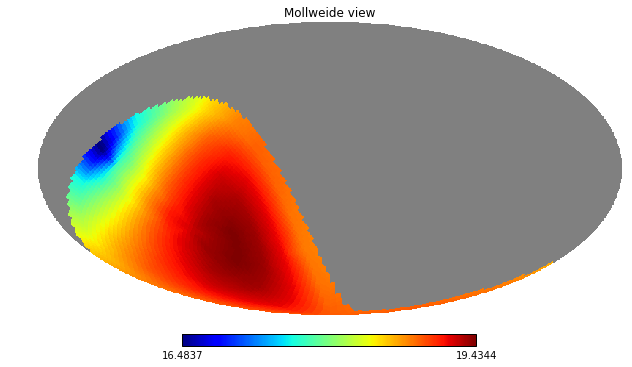

In [5]:
# Display the r-band map.  Note, things above airmass 2.5 end up as nan's.  
hp.mollview(mags[:,2])

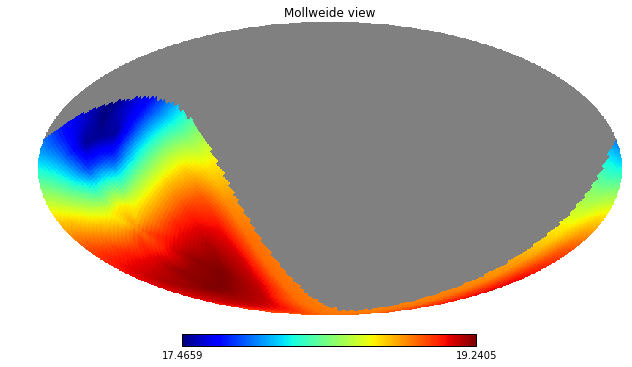

In [6]:
# Add a little bit to teh date to make sure things rise in the east and set in the west.
sm.setRaDecMjd(ra,dec,mjd+.1, degrees=False)
# mags in numpy array of size [ra.size, 6] where that last dimension in filter in u,g,r,i,z,y order
mags = sm.returnMags()
hp.mollview(mags[:,2])